In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
import shutil
import cv2
pd.set_option('display.max_columns', None)


Datos de las imágenes completas ZT filtradas y sin duplicados:

In [3]:
data = pd.read_csv("dataset_filtrado_ZT_info_limpio.csv")
data

,Codigo_Local_Operacion,Codigo_Equipo,Codigo_INMETRO,Fecha_Comprobacion_INMETRO,Codigo_OVD,Fecha_Comprobacion_OVD,Pista,Fecha_Paso_Vehicular,Hora_Paso_Vehicular,Secuencial_Imagen,Velocidad_Maxima,Velocidad_Maxima_Tolerada,Velocidad_Medida,Velocidad_Considerada,Tamaño_Vehiculo,Placa_Vehiculo,Tipo_Imagen,Tiempo_Ocupacion,Distancia_Vehiculo_Anterior,Cantidad_Ejes_Vehiculo,Codigo_Clasificacion_Vehiculo,Secuencial_Infraccion,Codigo_Infraccion_Vehiculo,Tiempo_Caracterizar_Inicio_Semaforo_Rojo,Tiempo_Avance_Rojo_Parada_Cebra,Tiempo_Caracterizar_Parada_Cebra,Tiempo_Parada_Vehiculo_Cebra,Path_Imagen
0,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52518,416646,60,66,39,35,168,DRT64D,ZT,468,1544,NaN,1,184851,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
1,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52849,416650,60,66,38,34,129,IBN25E,ZT,484,896,NaN,1,184853,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
2,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52853,416654,60,66,37,33,122,EJH95C,ZT,468,571,NaN,1,184855,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
3,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52856,416658,60,66,31,28,297,HON76E,ZT,780,1447,NaN,2,184857,30004,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
4,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,53305,416668,60,66,28,25,404,ITR241,ZT,1092,1619,NaN,2,184862,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,140613,326875,60,66,21,14,360,TSK762,ZT,1435,3752,NaN,2,117303,57462,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...
517,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,142345,326879,60,66,24,17,862,GKV390,ZT,2184,3950,NaN,3,117305,57462,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...
518,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,144505,326883,60,66,15,8,416,SMI313,ZT,2356,1062,NaN,2,117307,30003,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...
519,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,150119,326893,60,66,18,11,703,HIV019,ZT,2324,5194,NaN,3,117312,30003,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...


Imágenes recortadas por modelo faster rcnn inception resnet:

In [4]:
### Guardar los paths de las imagenes recortadas de las placas 

imagenes_placas = []
image_directory = "dataset_filtrado_ZT"

for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") and "placa_recortada" in filename:  
        image_path = os.path.join(image_directory, filename)
        imagenes_placas.append(image_path)

        

In [16]:
len(imagenes_placas)

426

In [12]:
## Agregar columna en el archivo .csv con path de las imagenes de placas recortadas

data['Path_Placa'] = ""

for i in range(len(imagenes_placas)):
    
    nombre_placa = os.path.splitext(os.path.basename(imagenes_placas[i]))[0]
    # Eliminar el sufijo "_placa_recortada" del nombre de la placa recortada
    nombre_placa_base = nombre_placa.replace("_placa_recortada", "")
    
    for j in range(len(data)):
        nombre_ZT = os.path.splitext(os.path.basename(data['Path_Imagen'][j]))[0]
        
        # Si los nombres coinciden, asignar el path de la imagen de la placa recortada
        if nombre_placa_base == nombre_ZT:
            data.loc[j, 'Path_Placa'] = imagenes_placas[i]
            break  

In [13]:
data['Path_Placa']

0                                                       
1                                                       
2      dataset_filtrado_ZT\60_VLS-S0173_M3982023_0101...
3                                                       
4                                                       
                             ...                        
516                                                     
517    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
518    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
519    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
520    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
Name: Path_Placa, Length: 521, dtype: object

'TKI917'

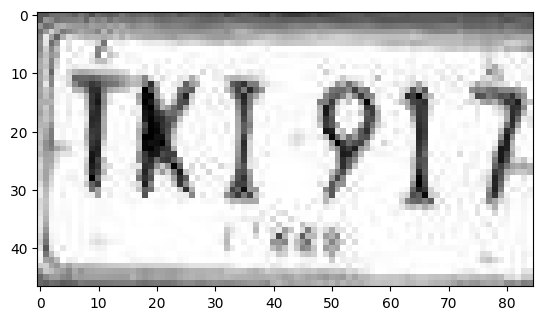

In [60]:
#Lectura de imagen de prueba
img = mpimg.imread(data['Path_Placa'][350])
imgplot = plt.imshow(img) 

data['Placa_Vehiculo'][350]

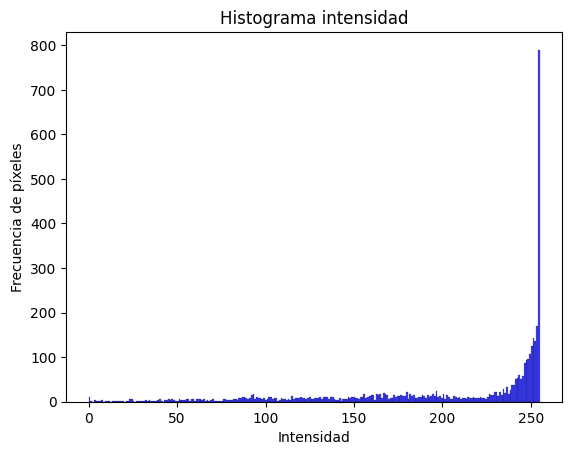

In [61]:
if img.ndim == 3:
    img = img.mean(axis=2)

#Histograma intensidad de pixeles
sns.histplot(img.ravel(), bins=256, kde=False, color='blue')
plt.title('Histograma intensidad')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia de píxeles')
plt.show()

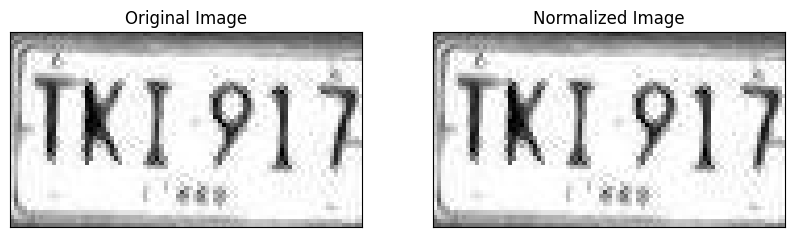

In [62]:
def normalize_image(image_path):
    # Load the image (in color or grayscale depending on your dataset)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Si es a color usa cv2.IMREAD_COLOR
    
    # If working with a grayscale image, normalization is applied directly
    normalized_image = cv2.normalize(image.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
    
    # Return the normalized image
    return normalized_image

# Test the function with a sample image
image_path = data['Path_Placa'][350]
normalized_image = normalize_image(image_path)

# Display the original and normalized image
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.xticks([]), plt.yticks([])

plt.show()


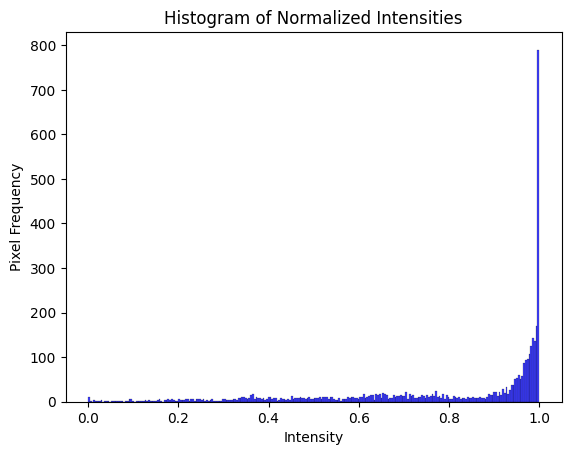

In [63]:
img = cv2.imread(data['Path_Placa'][350])

# Convert image to grayscale (if needed)
if img.ndim == 3:
    img = img.mean(axis=2)  # Convert to grayscale by averaging channels

# Define the minimum and maximum values for normalization
min_value = 0
max_value = 1

# Normalize the image to the range [min_value, max_value]
img_normalized = cv2.normalize(img.astype('float32'), None, min_value, max_value, cv2.NORM_MINMAX)

# Show histogram of normalized pixel intensities
sns.histplot(img_normalized.ravel(), bins=256, kde=False, color='blue')
plt.title('Histogram of Normalized Intensities')
plt.xlabel('Intensity')
plt.ylabel('Pixel Frequency')
plt.show()

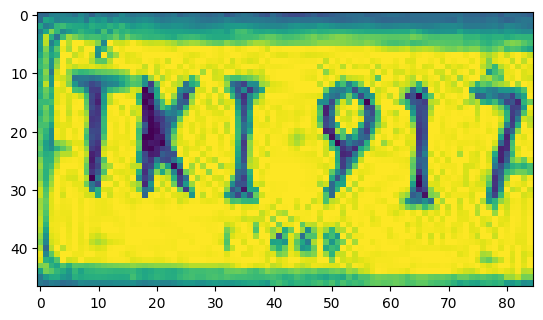

In [64]:
plt.imshow(img_normalized)